**Runge-Kutta 4th Order Method (RK4) for First-Order ODEs:**

The RK4 method is a numerical technique used to solve first-order ordinary differential equations (ODEs) of the form:



In [ ]:
dy/dx = f(x, y), y(x₀) = y₀



**Concept:**
- RK4 approximates the solution by combining weighted averages of slopes at different points within each step.
- It provides high accuracy by considering intermediate values between the current and next points.

**Formula:**
For a step size `h`, the next value of `y` is computed as:


In [ ]:
yₙ₊₁ = yₙ + (1/6) * (k₁ + 2k₂ + 2k₃ + k₄)

Where:
- `k₁ = h * f(xₙ, yₙ)`
- `k₂ = h * f(xₙ + h/2, yₙ + k₁/2)`
- `k₃ = h * f(xₙ + h/2, yₙ + k₂/2)`
- `k₄ = h * f(xₙ + h, yₙ + k₃)`

**Steps:**
1. Compute `k₁` using the slope at the beginning of the interval.
2. Compute `k₂` using the slope at the midpoint of the interval, adjusted by `k₁`.
3. Compute `k₃` using the slope at the midpoint, adjusted by `k₂`.
4. Compute `k₄` using the slope at the end of the interval, adjusted by `k₃`.
5. Combine these weighted slopes to estimate the next value of `y`.

**Advantages:**
- High accuracy compared to simpler methods like Euler's method.
- Suitable for stiff and non-linear ODEs.

**Applications:**
Used in engineering, physics, and computational sciences to solve ODEs where analytical solutions are difficult or impossible to obtain.

x values: [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004]
RK4 y values: [1, 1.1103416666666668, 1.242805141701389, 1.3997169941250756, 1.5836484801613715, 1.7974412771936765, 2.0442359241838663, 2.327503253193554, 2.651079126584631, 3.019202827560142, 3.436559488270332, 3.9083269801179634, 4.440227735556119, 5.038586020027669, 5.7103912272423285, 6.4633678312707605, 7.3060526955587, 8.247880512594522, 9.299278229337848, 10.471769403449168, 11.778089534751086]
Exact y values: [np.float64(1.0), np.float64(1.1103418361512953), np.float64(1.2428055163203398), np.float64(1.3997176151520063), np.float64(1.5836493952825408), np.float64(1.7974425414002564), np.float64(2.0442376007810177), np.float64(2.327505414940953), np.float64(2.651081856984935), np.float64(

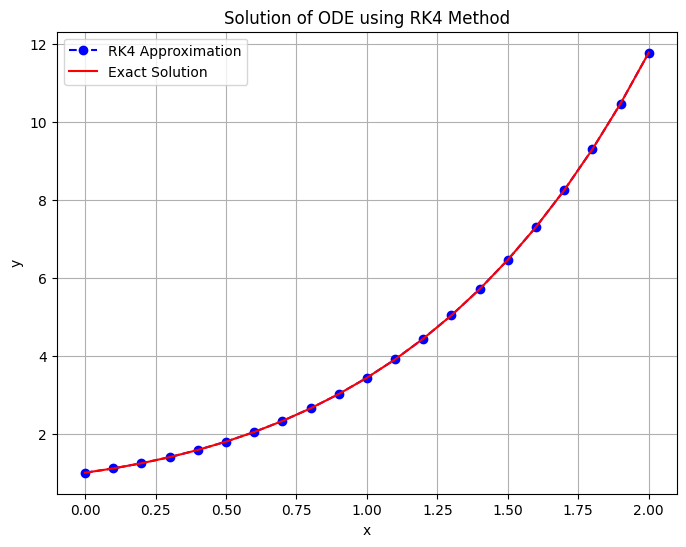

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function defining the ODE dy/dx = f(x, y)
def f(x, y):
    return x + y  # Example ODE: dy/dx = x + y

# Runge-Kutta 4th Order Method
def runge_kutta_4(f, x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]

    x = x0
    y = y0

    while x < x_end:
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)

        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x = x + h

        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

# Inputs
x0 = 0       # Initial x
y0 = 1       # Initial y
h = 0.1      # Step size
x_end = 2    # End point of x

# Solve the ODE using RK4
x_values, y_values = runge_kutta_4(f, x0, y0, h, x_end)

# Exact solution for comparison (if available)
def exact_solution(x):
    return -x - 1 + 2 * np.exp(x)  # Exact solution for dy/dx = x + y, y(0) = 1

exact_y_values = [exact_solution(x) for x in x_values]

# Print results
print("x values:", x_values)
print("RK4 y values:", y_values)
print("Exact y values:", exact_y_values)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, 'o--', label="RK4 Approximation", color='blue')
plt.plot(x_values, exact_y_values, label="Exact Solution", color='red')  # Removed redundant 'r-'
plt.title("Solution of ODE using RK4 Method")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import sympy as sp

# Define example function (can be overwritten by user)
def f(x, y):
    return x + y

# Function to get user-defined expression
def func_input():
    function_str = input("Enter your function (use 'x' and 'y' as the variables) (Example: x + y): ")
    x, y = sp.symbols('x y')
    sp_function = sp.sympify(function_str)
    func = sp.lambdify((x, y), sp_function, modules=['numpy'])
    return func, sp_function

# RK4 implementation
def rk4(func, x0, y0, xn, n):
    h = (xn - x0) / n

    print("\n-------------RK4-------------")
    print("x\t\ty")
    print("-----------------------------")

    for i in range(n):
        k1 = h * func(x0, y0)
        k2 = h * func(x0 + h/2, y0 + k1/2)
        k3 = h * func(x0 + h/2, y0 + k2/2)
        k4 = h * func(x0 + h, y0 + k3)

        k = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yn = y0 + k

        print(f"{x0:.4f}\t{y0:.4f}")
        
        y0 = yn
        x0 = x0 + h

    print()
    print(f"At x = {x0:.4f}, y = {yn:.4f}")

# Main function
def main():
    print("Runge-Kutta 4th Order (RK4) Method for Solving ODEs\n")

    # Default inputs
    function_str = "x + y"
    x0 = 0
    y0 = 1
    xn = 2
    step = 10

    default = input("Use default limits? (y/n): ").strip().lower() == "y"

    if not default:
        func, function_str = func_input()
        x0 = float(input("Enter initial value of x (x0): "))
        y0 = float(input("Enter initial value of y (y0): "))
        xn = float(input("Enter point to evaluate the solution (xn): "))
        step = int(input("Enter number of steps: "))
    else:
        x, y = sp.symbols('x y')
        sp_function = sp.sympify(function_str)
        func = sp.lambdify((x, y), sp_function, modules=['numpy'])

    print(f"\nF(x, y) = {function_str}")
    print(f"F({x0}, {y0}) = {func(x0, y0)}")
    print(f"From x0 = {x0}")
    print(f"To xn = {xn}")
    print(f"Number of steps = {step}")

    # Call RK4 method
    rk4(func, x0, y0, xn, step)

if __name__ == "__main__":
    main()


Runge-Kutta 4th Order (RK4) Method for Solving ODEs


F(x, y) = x + y
F(0, 1) = 1
From x0 = 0
To xn = 2
Number of steps = 10

-------------RK4-------------
x		y
-----------------------------
0.0000	1.0000
0.2000	1.2428
0.4000	1.5836
0.6000	2.0442
0.8000	2.6510
1.0000	3.4365
1.2000	4.4401
1.4000	5.7103
1.6000	7.3059
1.8000	9.2990

At x = 2.0000, y = 11.7778


**Runge-Kutta 4th Order Method (RK4) for Systems of ODEs (2nd Order ODE):**

The RK4 method can be extended to solve systems of ordinary differential equations (ODEs), including second-order ODEs, by converting them into a system of first-order ODEs.

**Concept:**
A second-order ODE of the form:


In [ ]:
d²y/dx² = f(x, y, dy/dx)

is converted into a system of two first-order ODEs:
1. Let `y₁ = y` (displacement), and `y₂ = dy/dx` (velocity).
2. Then:
   ```
   dy₁/dx = y₂
   dy₂/dx = f(x, y₁, y₂)
   ```

**RK4 Formula for Systems:**
For each variable (`y₁` and `y₂`), the RK4 method computes:


In [ ]:
y₁ₙ₊₁ = y₁ₙ + (1/6) * (k₁₁ + 2k₂₁ + 2k₃₁ + k₄₁)
y₂ₙ₊₁ = y₂ₙ + (1/6) * (k₁₂ + 2k₂₂ + 2k₃₂ + k₄₂)

Where:
- `k₁₁ = h * f₁(xₙ, y₁ₙ, y₂ₙ)`
- `k₁₂ = h * f₂(xₙ, y₁ₙ, y₂ₙ)`
- `k₂₁ = h * f₁(xₙ + h/2, y₁ₙ + k₁₁/2, y₂ₙ + k₁₂/2)`
- `k₂₂ = h * f₂(xₙ + h/2, y₁ₙ + k₁₁/2, y₂ₙ + k₁₂/2)`
- `k₃₁ = h * f₁(xₙ + h/2, y₁ₙ + k₂₁/2, y₂ₙ + k₂₂/2)`
- `k₃₂ = h * f₂(xₙ + h/2, y₁ₙ + k₂₁/2, y₂ₙ + k₂₂/2)`
- `k₄₁ = h * f₁(xₙ + h, y₁ₙ + k₃₁, y₂ₙ + k₃₂)`
- `k₄₂ = h * f₂(xₙ + h, y₁ₙ + k₃₁, y₂ₙ + k₃₂)`

**Steps:**
1. Compute intermediate slopes (`k₁`, `k₂`, `k₃`, `k₄`) for each variable (`y₁` and `y₂`).
2. Update `y₁` and `y₂` using the weighted average of these slopes.
3. Repeat for all steps until the desired range of `x` is covered.

**Advantages:**
- Handles coupled equations efficiently.
- Provides high accuracy for solving second-order ODEs.

**Applications:**
Used in physics, engineering, and computational sciences for problems like:
- Simple harmonic motion.
- Projectile motion.
- Electrical circuits involving second-order differential equations.

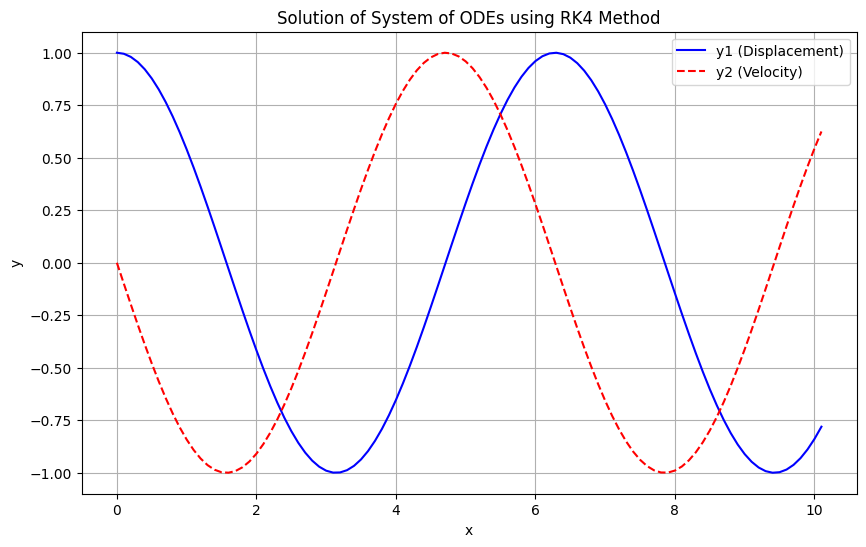

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of ODEs
def f1(x, y1, y2):
    return y2  # Example: dy1/dx = y2

def f2(x, y1, y2):
    return -y1  # Example: dy2/dx = -y1 (Simple harmonic motion)

# RK4 Method for System of ODEs
def rk4_system(f1, f2, x0, y10, y20, h, x_end):
    x_values = [x0]
    y1_values = [y10]
    y2_values = [y20]

    x = x0
    y1 = y10
    y2 = y20

    while x < x_end:
        k1_y1 = h * f1(x, y1, y2)
        k1_y2 = h * f2(x, y1, y2)

        k2_y1 = h * f1(x + h/2, y1 + k1_y1/2, y2 + k1_y2/2)
        k2_y2 = h * f2(x + h/2, y1 + k1_y1/2, y2 + k1_y2/2)

        k3_y1 = h * f1(x + h/2, y1 + k2_y1/2, y2 + k2_y2/2)
        k3_y2 = h * f2(x + h/2, y1 + k2_y1/2, y2 + k2_y2/2)

        k4_y1 = h * f1(x + h, y1 + k3_y1, y2 + k3_y2)
        k4_y2 = h * f2(x + h, y1 + k3_y1, y2 + k3_y2)

        y1 = y1 + (k1_y1 + 2 * k2_y1 + 2 * k3_y1 + k4_y1) / 6
        y2 = y2 + (k1_y2 + 2 * k2_y2 + 2 * k3_y2 + k4_y2) / 6
        x = x + h

        x_values.append(x)
        y1_values.append(y1)
        y2_values.append(y2)

    return x_values, y1_values, y2_values

# Inputs
x0 = 0         # Initial x
y10 = 1        # Initial y1 (Displacement)
y20 = 0        # Initial y2 (Velocity)
h = 0.1        # Step size
x_end = 10     # End point of x

# Solve the system of ODEs
x_values, y1_values, y2_values = rk4_system(f1, f2, x0, y10, y20, h, x_end)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(x_values, y1_values, 'b-', label="y1 (Displacement)")
plt.plot(x_values, y2_values, 'r--', label="y2 (Velocity)")
plt.title("Solution of System of ODEs using RK4 Method")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


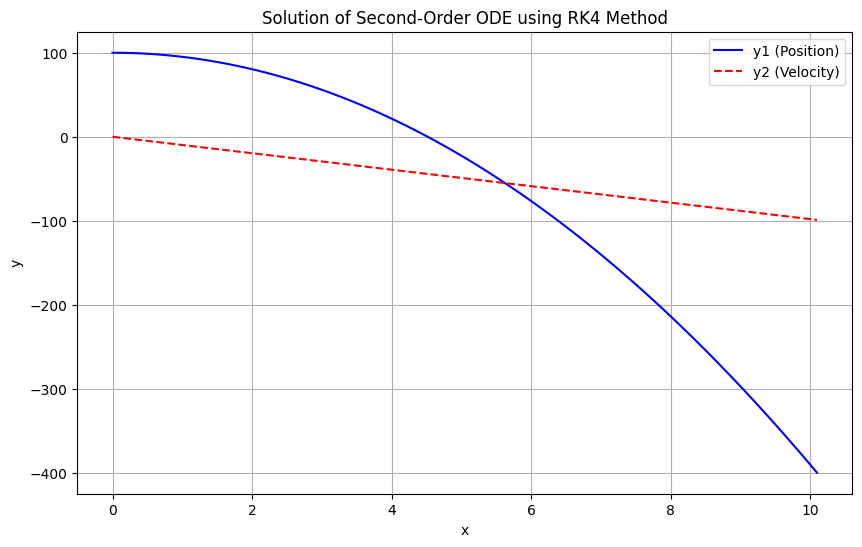

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Convert 2nd order ODE to system of 1st order ODEs
def f1(x, y1, y2):
    return y2  # dy1/dx = y2

def f2(x, y1, y2):
    return -9.8  # dy2/dx = -9.8 (acceleration due to gravity)

# RK4 Method for System of ODEs
def rk4_system(f1, f2, x0, y10, y20, h, x_end):
    x_values = [x0]
    y1_values = [y10]
    y2_values = [y20]

    x = x0
    y1 = y10
    y2 = y20

    while x < x_end:
        k1_y1 = h * f1(x, y1, y2)
        k1_y2 = h * f2(x, y1, y2)

        k2_y1 = h * f1(x + h/2, y1 + k1_y1/2, y2 + k1_y2/2)
        k2_y2 = h * f2(x + h/2, y1 + k1_y1/2, y2 + k1_y2/2)

        k3_y1 = h * f1(x + h/2, y1 + k2_y1/2, y2 + k2_y2/2)
        k3_y2 = h * f2(x + h/2, y1 + k2_y1/2, y2 + k2_y2/2)

        k4_y1 = h * f1(x + h, y1 + k3_y1, y2 + k3_y2)
        k4_y2 = h * f2(x + h, y1 + k3_y1, y2 + k3_y2)

        y1 = y1 + (k1_y1 + 2 * k2_y1 + 2 * k3_y1 + k4_y1) / 6
        y2 = y2 + (k1_y2 + 2 * k2_y2 + 2 * k3_y2 + k4_y2) / 6
        x = x + h

        x_values.append(x)
        y1_values.append(y1)
        y2_values.append(y2)

    return x_values, y1_values, y2_values

# Inputs
x0 = 0         # Initial x
y10 = 100      # Initial y1 (Position)
y20 = 0        # Initial y2 (Velocity)
h = 0.1        # Step size
x_end = 10     # End point of x

# Solve using RK4 method
x_values, y1_values, y2_values = rk4_system(f1, f2, x0, y10, y20, h, x_end)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(x_values, y1_values, 'b-', label="y1 (Position)")
plt.plot(x_values, y2_values, 'r--', label="y2 (Velocity)")
plt.title("Solution of Second-Order ODE using RK4 Method")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


In [5]:
import sympy as sp

# Example function
def f(x, y):
    return (y**2 - x**2) / (y**2 + x**2)

# Function to input user-defined ODE
def func_input():
    function_str = input("Enter your function (use 'x' and 'y' as the variables) (Example: (y**2 - x**2)/(y**2 + x**2)): ")
    x, y = sp.symbols('x y')
    sp_function = sp.sympify(function_str)
    func = sp.lambdify((x, y), sp_function, modules=['numpy'])
    return func, sp_function

# Runge-Kutta 4th Order method
def rk4(func, x0, y0, xn, n):
    h = (xn - x0) / n  # Step size

    print("\n-----------RK4------------")
    print("x\t\ty")
    print("--------------------------")
    
    for i in range(n):
        k1 = h * func(x0, y0)
        k2 = h * func(x0 + h / 2, y0 + k1 / 2)
        k3 = h * func(x0 + h / 2, y0 + k2 / 2)
        k4 = h * func(x0 + h, y0 + k3)

        k = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yn = y0 + k

        print(f"{x0:.4f}\t{y0:.4f}")
        print("--------------------------")

        x0 += h
        y0 = yn

    print(f"\nValue of y at x = {xn:.4f} is {yn:.4f}")

# Main function
def main():
    print("Runge-Kutta 4th Order (RK-4) Method for Solving ODEs\n")

    # Default values
    function_str = "(y**2 - x**2) / (y**2 + x**2)"
    func = f
    x0 = 0.0
    y0 = 1.0
    xn = 2.0
    n = 10

    default = input("Use default values? (y/n): ").strip().lower() == 'y'
    
    if not default:
        func, function_str = func_input()
        x0 = float(input("Enter initial value of x (x0): "))
        y0 = float(input("Enter initial value of y (y0): "))
        xn = float(input("Enter value of x to evaluate the solution (xn): "))
        n = int(input("Enter number of steps: "))

    print(f"\nFunction: f(x, y) = {function_str}")
    print(f"Initial Conditions: x0 = {x0}, y0 = {y0}")
    print(f"Evaluate at x = {xn}, Steps = {n}\n")

    # Solve using RK4
    rk4(func, x0, y0, xn, n)

if __name__ == "__main__":
    main()


Runge-Kutta 4th Order (RK-4) Method for Solving ODEs


Function: f(x, y) = (y**2 - x**2) / (y**2 + x**2)
Initial Conditions: x0 = 0.0, y0 = 1.0
Evaluate at x = 2.0, Steps = 10


-----------RK4------------
x		y
--------------------------
0.0000	1.0000
--------------------------
0.2000	1.1960
--------------------------
0.4000	1.3753
--------------------------
0.6000	1.5331
--------------------------
0.8000	1.6691
--------------------------
1.0000	1.7839
--------------------------
1.2000	1.8781
--------------------------
1.4000	1.9521
--------------------------
1.6000	2.0064
--------------------------
1.8000	2.0412
--------------------------

Value of y at x = 2.0000 is 2.0565
